In [ ]:
#numpy for linear algebra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import norm

In [ ]:
plt.rcParams["figure.figsize"] = (14,10)
plt.rcParams.update({'font.size': 20})

# **Linearity**

**A linear function is a function whose graph lies on a straight line and which can be described by giving the slope and y intercept of that line.**

**For our example, we have the following linear function: $y = 2(x) + 4$**

<sup>Source: [Linearity](https://math.mit.edu/~djk/calculus_beginners/chapter03/section03.html) from Calculus for Beginners and Artists by Daniel Kleitman</sup>

In [ ]:
def linear_func(x):
  return 2 * x + 4

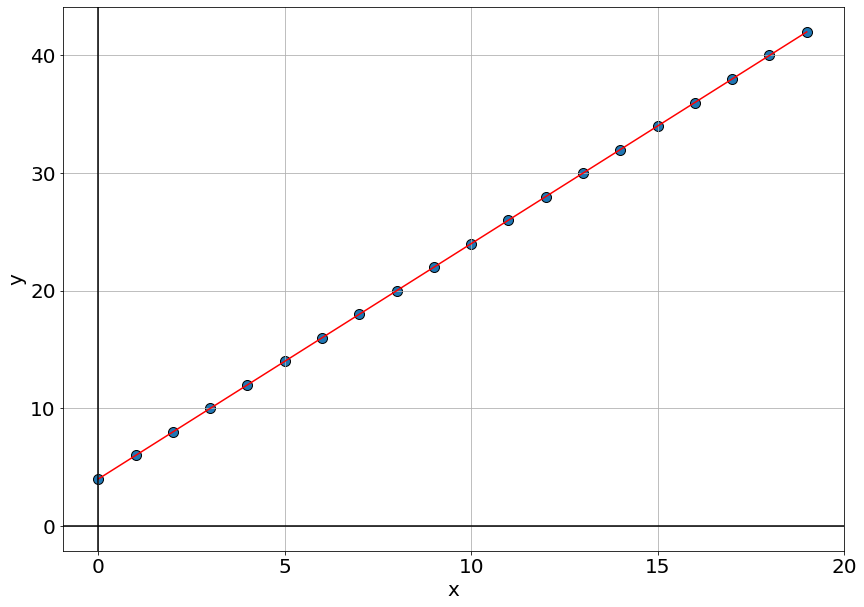

In [ ]:
plt.scatter([x for x in range(0,20)], [linear_func(x) for x in range(0,20)], s = 100, edgecolors='black')
plt.plot([x for x in range(0,20)], [linear_func(x) for x in range(0,20)], color='red')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xticks(range(0,25,5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

$\Large{\text{Slope = } \frac{y_i - y_{i-1}}{x_i - x_{i-1}}}$

In [ ]:
pd.DataFrame({'y Value':[linear_func(x) for x in range(0,20)],
              'Slope': [linear_func(x) - linear_func(x_prev)  for x,x_prev in zip(range(0,20),range(-1,19))]}).rename_axis('x Value')

,y Value,Slope
x Value,,
0,4,2
1,6,2
2,8,2
3,10,2
4,12,2
5,14,2
6,16,2
7,18,2
8,20,2


# **Creating an Artificial Data Set**

**We will create two variables: $x$ the number of hours it takes to mine a Bitcoin and $y$ the cost of mining the Bitcoin.**

**$x$ or the number of hours it takes to mine a Bitcoin is the independent or explanatory variable. For our linear regression we will use this variable as the input.**

**$y$ or the cost of mining Bitcoin is the dependent or response variable in our model. Given the number of hours it takes to mine a Bitcoin, we are forecasting the cost of the mining process.**

**$\epsilon$ or random noise that can be found in the process.**

$\large{\text{Cost of Mining Bitcoin = (Number of Mining hours)(\$100) + $\epsilon$}}$

In [ ]:
#the np.random.normal is the normal error term
def func(x):
  return x * 100 + np.random.normal(loc = 0, scale = 40)

In [ ]:
x = np.arange(1,12,1)

#set seed to follow along with the video
np.random.seed(5)
y_sample = np.array([func(x) for x in x])

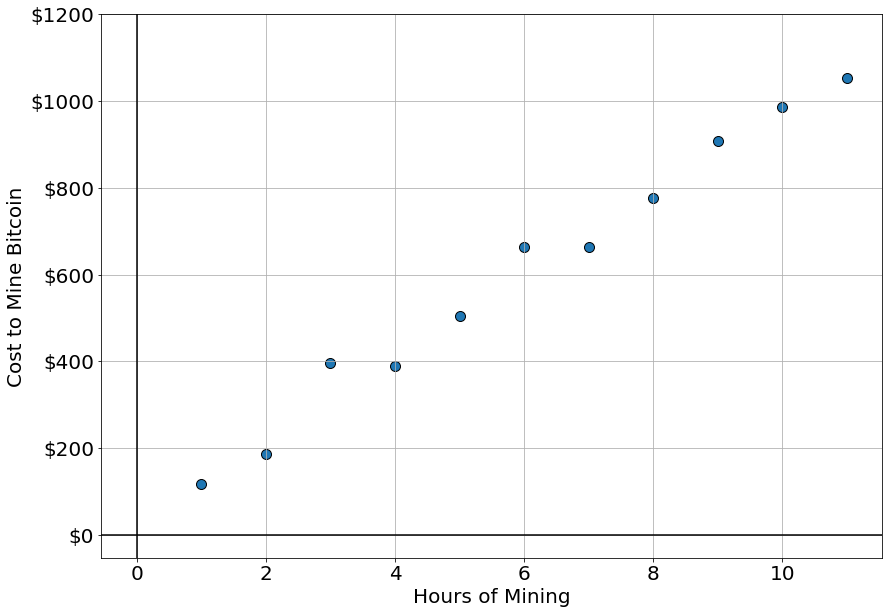

In [ ]:
plt.scatter(x, y_sample, s = 100, edgecolors='black')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
cost_label = ['$' + str(cost) for cost in range(0,1400,200)]
plt.yticks(range(0,1400,200), cost_label)
plt.grid();

# **Assumptions of Linear Regression**

**There are four assumptions that linear regression models make:**

**1. The relationship between the dependent and independent variables must be linear.**

**2. The error (also known as residuals) of the model must be indepedent from the dependent variables. The error is the difference between the actual value and predicted value for the depedent variable.**

**3. The model errors need to approximate a normal distribution.**

**4.The variance of the errors need to be homoscedastic, meaning the variance is constant over: time, prediction and against any independent variable.**


<sup>Source: [Assumptions for the SLR Model](https://online.stat.psu.edu/stat500/lesson/9/9.2/9.2.3) from Penn State's Eberly College of Science</sup>

<sup>Source: [Regression diagnostics:  testing the assumptions of linear regression](https://people.duke.edu/~rnau/testing.htm) by Robert Nau</sup>

# **Simple Linear Regression**

**A simple linear regression models the relationship between an independent variable (in our example hours of mining) and the dependent variable (cost to mine Bitcoin).**

$\large{y_{predicted} = \beta_0 + \beta_1x_i} + ϵ$

$\text{Where: $y_{predicted}$ is the predicted value, $x_i$ is the input value, $\beta_0$ is the intercept and ϵ is the error term.}$

<sup>Source: [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) from Wikipedia</sup>

## **Solving for the beta coefficient (slope):**

 $\large{\beta_1 = \frac{\sum^n_{i=1} (x_i-\bar{x})(y_i-\bar{y})}{\sum^n_{i=1}(x_i-\bar{x})^2}}$

$\text{Where $\bar{y}$ is the average of the observed dependent samples, $\bar{x}$ is the average of observed independent variables}$

$\text{and $\beta_0$ is the intercept.}$

<sup>Source: [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) from Wikipedia</sup>

In [ ]:
def lin_reg_beta(x,y):
  return sum(np.array([x_i - np.mean(x) for x_i in x]) * np.array([y_i - np.mean(y) for y_i in y]))/sum(np.array([x_i - np.mean(x) for x_i in x])**2)

beta = lin_reg_beta(x,y_sample)

beta

93.96603821575403

## **Solving for the intercept:**

$\large{\beta_0 = \bar{y} - \beta_1\bar{x}}$

In [ ]:
def lin_reg_intercept(x,y,beta):
  y,x = np.array(y),np.array(x)
  return y.mean() - beta*x.mean()

intercept = lin_reg_intercept(x,y_sample,beta)

intercept

40.36823231960216

## **Predicting Values with a Linear Regression Model**

$\large{y_{predicted} = \beta_0 + \beta_1x_i}$

$\text{= Predicted Cost of Bitcoin Mining = Intercept of Model + (Coefficient Estimate)(Number of Hours Spent Mining)}$

$\text{Predicted Cost of Bitcoin Mining $\approx$ 40.37 + (93.97)(Number of Hours Spent Mining)}$

In [ ]:
#linear regression model
y_pred_lin = [x_i * beta + intercept for x_i in x]

for hour,cost,actual_cost in zip(x,y_pred_lin,y_sample):
  print(f'For {hour} hour(s) of mining, the predicted cost is {cost:.2f}. The actual cost is {actual_cost:.2f}')

For 1 hour(s) of mining, the predicted cost is 134.33. The actual cost is 117.65
For 2 hour(s) of mining, the predicted cost is 228.30. The actual cost is 186.77
For 3 hour(s) of mining, the predicted cost is 322.27. The actual cost is 397.23
For 4 hour(s) of mining, the predicted cost is 416.23. The actual cost is 389.92
For 5 hour(s) of mining, the predicted cost is 510.20. The actual cost is 504.38
For 6 hour(s) of mining, the predicted cost is 604.16. The actual cost is 663.30
For 7 hour(s) of mining, the predicted cost is 698.13. The actual cost is 663.63
For 8 hour(s) of mining, the predicted cost is 792.10. The actual cost is 776.33
For 9 hour(s) of mining, the predicted cost is 886.06. The actual cost is 907.50
For 10 hour(s) of mining, the predicted cost is 980.03. The actual cost is 986.81
For 11 hour(s) of mining, the predicted cost is 1073.99. The actual cost is 1052.29


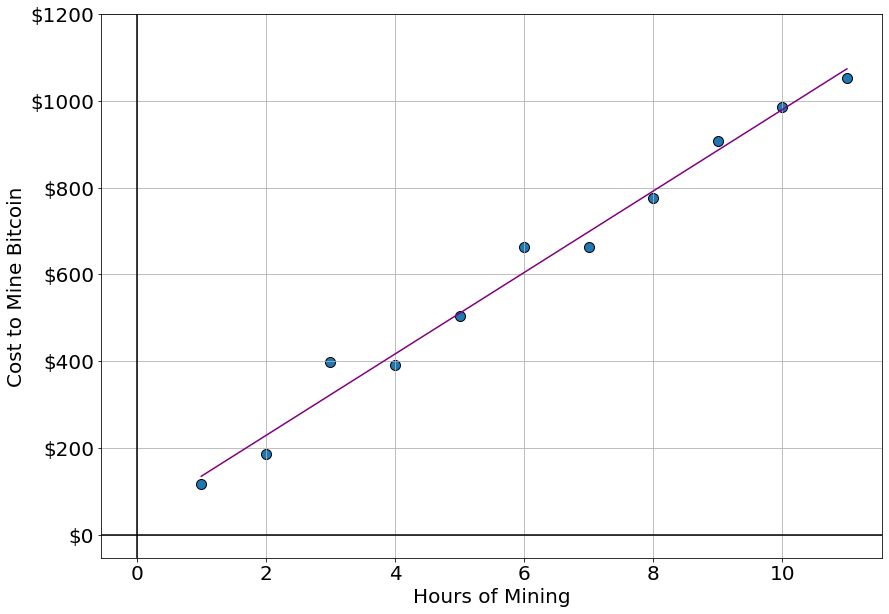

In [ ]:
plt.scatter(x, y_sample, s = 100, edgecolors='black')
plt.plot(x, y_pred_lin, color='purple')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
cost_label = ['$' + str(cost) for cost in range(0,1400,200)]
plt.yticks(range(0,1400,200), cost_label)
plt.grid();

In [ ]:
pd.DataFrame({'Predicted y Value (Cost to Mine)':y_pred_lin,
              'x Value (Hours Mining)': x,
              'Slope': [x_plusone - (x_i*beta + intercept) for x_plusone, x_i in zip(y_pred_lin,range(len(y_pred_lin)))]}).set_index('x Value (Hours Mining)')

,Predicted y Value (Cost to Mine),Slope
x Value (Hours Mining),,
1,134.334271,93.966038
2,228.300309,93.966038
3,322.266347,93.966038
4,416.232385,93.966038
5,510.198423,93.966038
6,604.164462,93.966038
7,698.130500,93.966038
8,792.096538,93.966038
9,886.062576,93.966038


## **Matrix Form**

**$[\beta_0,\beta_1] = (X^{\text{T}}X)^{-1}X^{\text{T}}Y$**

$Y_{predicted} =  X^{\text{T}}\beta_1 + \beta_0$

### **Expanded Form for the Slope and Intercept**

$Y = \begin{bmatrix}
  117.649 & 186.765 & \cdots & 986.805 & 1052.289 
\end{bmatrix} \ \ \ \ X = \begin{bmatrix}
  1 & 1 & \cdots & 1 & 1 \\ 1 & 2 & \cdots & 10 & 11 
\end{bmatrix} \ \ \ \ X^{\text{T}} = \begin{bmatrix}
  1 & 1 \\ 1 & 2 \\ \vdots & \vdots \\ 1 & 10 \\ 1 & 11 \\ 
\end{bmatrix}$

$X \cdot X^{\text{T}} = \begin{bmatrix}
  1 & 1 & \cdots & 1 & 1 \\ 1 & 2 & \cdots & 10 & 11 
\end{bmatrix} \cdot \begin{bmatrix}
  1 & 1 \\ 1 & 2 \\ \vdots & \vdots \\ 1 & 10 \\ 1 & 11 \\ 
\end{bmatrix} =  \begin{bmatrix}
  11 & 66 \\ 66 & 506 \\ 
\end{bmatrix}$

\\

$[X \cdot X^{\text{T}}]^{-1} = \begin{bmatrix}
  0.41818182 & -0.05454545 \\ -0.05454545 & 0.00909091 \\ 
\end{bmatrix}$

\\

$Y \cdot X^{\text{T}} = \begin{bmatrix}
  117.649 & 186.765 & \cdots & 986.805 & 1052.289 
\end{bmatrix} \cdot \begin{bmatrix}
  1 & 1 \\ 1 & 2 \\ \vdots & \vdots \\ 1 & 10 \\ 1 & 11 \\ 
\end{bmatrix} = \begin{bmatrix}
  6645.80907776 & 50211.11867027 
\end{bmatrix}$

\\

$[\beta_0,\beta_1] = [X \cdot X^{\text{T}}]^{-1} \cdot Y \cdot X^{\text{T}} = \begin{bmatrix}
  40.36823232 & 93.96603822 
\end{bmatrix}$

### **Expanded Form for the Cost to Mine Prediction**

$Y_{predicted} =  X^{\text{T}}\beta_1  + \beta_0 = \begin{bmatrix}
   134.33 &  228.30 & \cdots & 980.03 & 1073.99 
\end{bmatrix}$

In [ ]:
def lin_mf_fit(x_vals,y):
  #convert x,y to numpy arrays in case they were input as lists
  x_vals = np.array(x_vals)
  y = np.array(y)
  x_array = np.concatenate((np.ones(x_vals.shape),x_vals)).reshape(2,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  #returns the intercept and slope for the linear regression
  return np.dot(x_inv,x_dot_y)

def lin_mf_pred(x_vals,coefficients):
  return np.dot(coefficients[1], x_vals) + coefficients[0]

y_pred = lin_mf_pred(x,lin_mf_fit(x, y_sample))

In [ ]:
y_pred

array([ 134.33427054,  228.30030875,  322.26634697,  416.23238518,
        510.1984234 ,  604.16446161,  698.13049983,  792.09653805,
        886.06257626,  980.02861448, 1073.99465269])

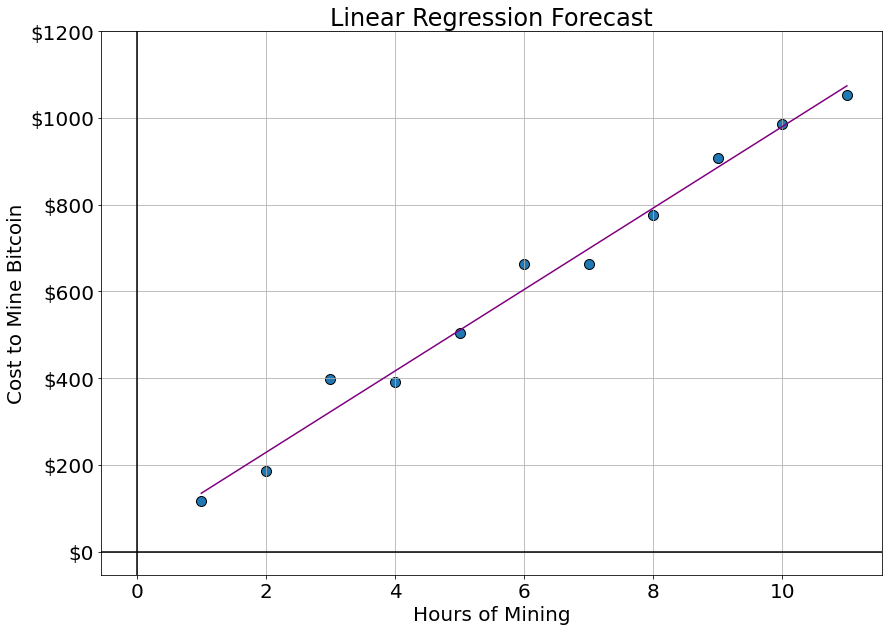

In [ ]:
plt.scatter(x, y_sample, s = 100, edgecolors='black')
plt.plot(x, y_pred, color='purple')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
cost_label = ['$' + str(cost) for cost in range(0,1400,200)]
plt.yticks(range(0,1400,200), cost_label)
plt.title('Linear Regression Forecast')
plt.grid();

## **Comparing our models to sklearn's model**

In [ ]:
from sklearn.linear_model import LinearRegression

sc_lin_reg = LinearRegression().fit(x.reshape(-1, 1), y_sample)
sc_preds = sc_lin_reg.predict(x.reshape(-1,1))

In [ ]:
pd.DataFrame({'Linear Regression by Algebra':y_pred_lin,
             'Linear Regression by Linear Algebra': y_pred,
              'Linear Regression by SciPy Module': sc_preds})

,Linear Regression by Algebra,Linear Regression by Linear Algebra,Linear Regression by SciPy Module
0,134.334271,134.334271,134.334271
1,228.300309,228.300309,228.300309
2,322.266347,322.266347,322.266347
3,416.232385,416.232385,416.232385
4,510.198423,510.198423,510.198423
5,604.164462,604.164462,604.164462
6,698.130500,698.130500,698.130500
7,792.096538,792.096538,792.096538
8,886.062576,886.062576,886.062576
9,980.028614,980.028614,980.028614


## **Comparing runtimes**

In [ ]:
%%timeit 
beta = lin_reg_beta(x,y_sample)
intercept = lin_reg_intercept(x,y_sample,beta)
y_pred_lin = [x_i*beta + intercept for x_i in x]

1000 loops, best of 5: 594 µs per loop


In [ ]:
%timeit y_pred = lin_mf_pred(x,lin_mf_fit(x, y_sample))

The slowest run took 68.90 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 65.8 µs per loop


In [ ]:
%%timeit 
sc_lin_reg = LinearRegression().fit(x.reshape(-1, 1), y_sample)
sc_preds = sc_lin_reg.predict(x.reshape(-1,1))

The slowest run took 9.46 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 569 µs per loop


## **Mean Squared Error**

**Mean squared error (MSE) is the sum of squared differences
between the predicted and true values. As the error rate increases, the MSE penalty grows quadratically, which heavily penalizes a model. A downside to MSE is if applied to a data set with a few outliers, it can heavily penalize a model.**

**MSE is one of the most popular tools to measure how accurate models are within statistics and machine learning.**

**Within Machine Learning, MSE is used as a loss function or part of a loss function that an algorithm minimizes.**

### $MSE = \displaystyle \frac{1}{N} \sum_{i=0}^N (y_i - \hat{y_i})^2 = \displaystyle \frac{1}{N} \sum_{i=0}^N (error_i)^2$

### $\text{Where: $N$=number of observed values, $y_i$ = observed target value, $\hat{y}=$ predicted}$

### $\text{target value.}$

<sup>Source: [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido</sup>

In [ ]:
regressor = KNeighborsRegressor()
#reshape the array since there's only 1 explanatory variable
regressor.fit(x.reshape(-1,1), y_sample)
knn_pred = regressor.predict(x.reshape(-1,1))

In [ ]:
def mse(actual_y, predicted_y):
  return sum([(y_s - y_pred)**2 for y_s,y_pred in zip(actual_y, predicted_y)])*(1/len(actual_y))

In [ ]:
#a lower mse is better
mse(y_sample, y_pred)

1296.5413138438153

In [ ]:
mse(y_sample, knn_pred)

10524.351369777067

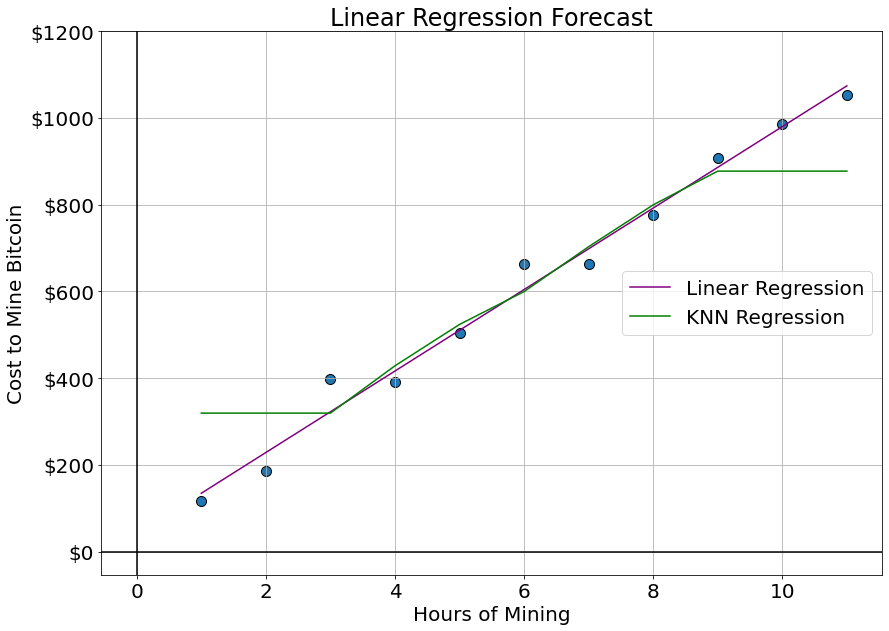

In [ ]:
plt.scatter(x, y_sample, s = 100, edgecolors='black')
plt.plot(x, y_pred, color='purple', label = 'Linear Regression')
plt.plot(x, knn_pred, color='green', label = 'KNN Regression')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
cost_label = ['$' + str(cost) for cost in range(0,1400,200)]
plt.yticks(range(0,1400,200), cost_label)
plt.title('Linear Regression Forecast')
plt.grid()
plt.legend();

# **Testing the Assumptions of Linear Regression for our Model**

In [ ]:
x2 = np.arange(1,1000,1)
np.random.seed(5)
y_sample2 = np.array([func(x) for x in x2])

## **Assumption 1: Linear relationship between the dependent and independent variables**

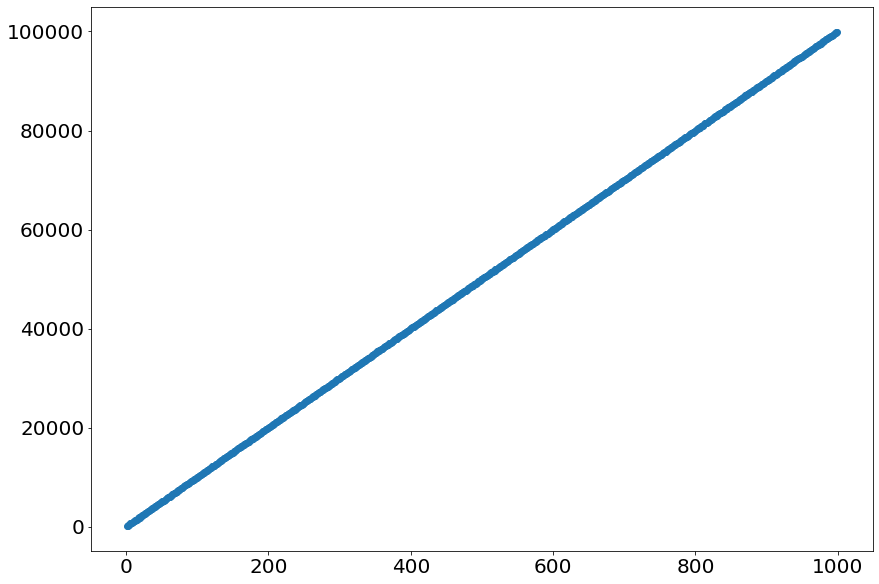

In [ ]:
plt.scatter(x2,y_sample2);

## **Assumption 2: Independence of Errors**

In [ ]:
coeff = lin_mf_fit(x2,y_sample2)
y_pred2 = lin_mf_pred(x2,coeff)

In [ ]:
error2 = y_sample2 - y_pred2

In [ ]:
error_fit = lin_mf_fit(y_pred2,error2)
error_pred = lin_mf_pred(y_pred2,error_fit)

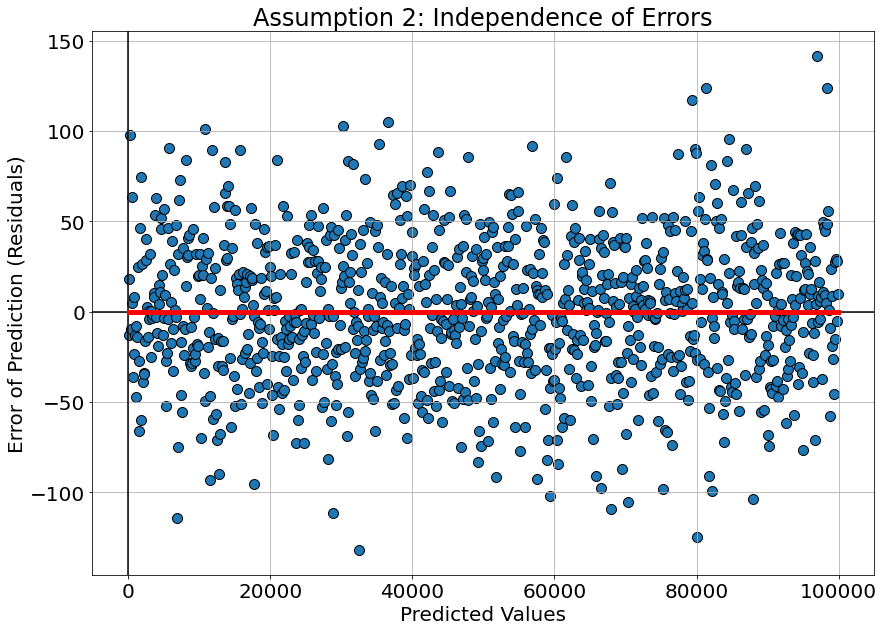

In [ ]:
plt.scatter(y_pred2, error2, s = 100, edgecolors='black')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.plot(y_pred2,error_pred, color='red', lw=5)
plt.xlabel('Predicted Values')
plt.ylabel('Error of Prediction (Residuals)')
plt.grid()
plt.title('Assumption 2: Independence of Errors');

## **Assumption 3: Normality of Errors**

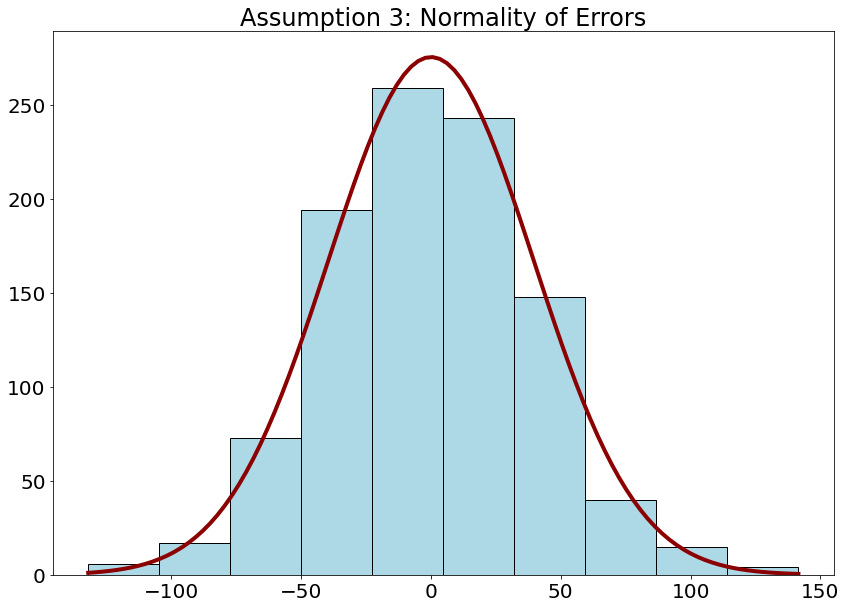

In [ ]:
(mu, sigma) = norm.fit(error2)
x_space = np.linspace(min(error2), max(error2), 100)

values, bins, _ = plt.hist(error2, edgecolor='black', color='lightblue')
area = sum(np.diff(bins) * values)

plt.plot(x_space, norm.pdf(x_space, mu, sigma) * area, color='darkred', lw = 4)
plt.title('Assumption 3: Normality of Errors');

## **Assumption 4: Homoscedasticity**

In [ ]:
standardized_error = []

for num in error2:
  standardized_error.append((num-error2.mean())/error2.std())

standardized_ypred = []

for y_pred in y_pred2:
  standardized_ypred.append((y_pred-y_pred2.mean())/y_pred2.std())

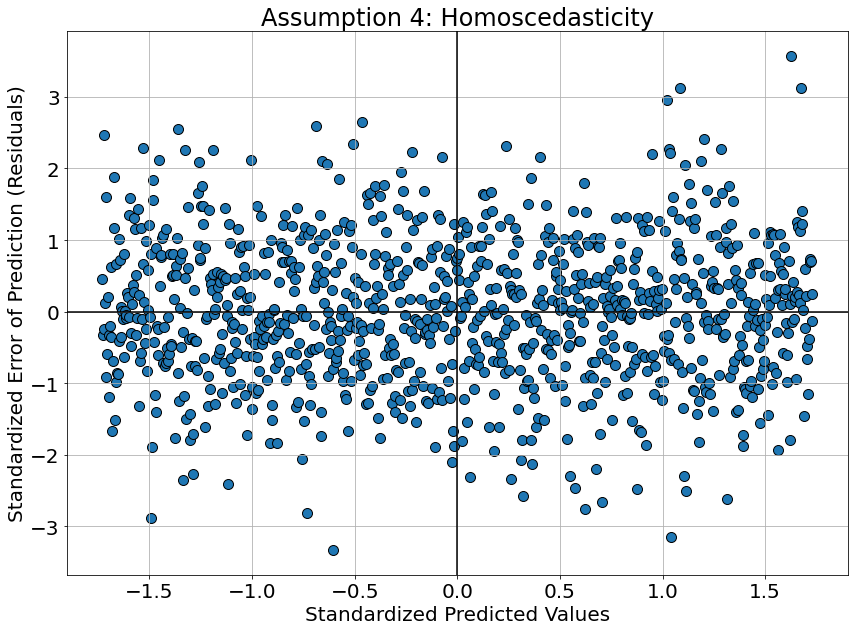

In [ ]:
plt.scatter(standardized_ypred,standardized_error, s = 100, edgecolors='black')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Error of Prediction (Residuals)')
plt.grid()
plt.title('Assumption 4: Homoscedasticity');

# **References and Additional Learning**

## **Textbook**
- **[Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido**

## **Websites**

- **[Assumptions for the SLR Model](https://online.stat.psu.edu/stat500/lesson/9/9.2/9.2.3) from Penn State's Eberly College of Science**

- **[Calculus for Beginners and Artists](https://math.mit.edu/~djk/calculus_beginners/index.html) by Daniel Kleitman**

- **[Recognizing linear functions](https://www.khanacademy.org/math/cc-eighth-grade-math/cc-8th-linear-equations-functions/linear-nonlinear-functions-tut/v/recognizing-linear-functions) by Khan Academy**

- **[Regression diagnostics:  testing the assumptions of linear regression](https://people.duke.edu/~rnau/testing.htm) by Robert Nau**

- **[Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) from Wikipedia**